In [8]:
import pandas as pd
import numpy as np

# 1. DATA LOADING

In [11]:
df = pd.read_csv("Healthcare-Diabetes.csv")
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


# 2. DATA CLEANSING

In [13]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3. PREPOCESING DATA

In [497]:
df_new2 = df.copy()
df_new2.drop(columns=["Id",],inplace=True)

In [499]:
df_new2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


# 4. EXSPLORASI DATA ANALITIK (EDA)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

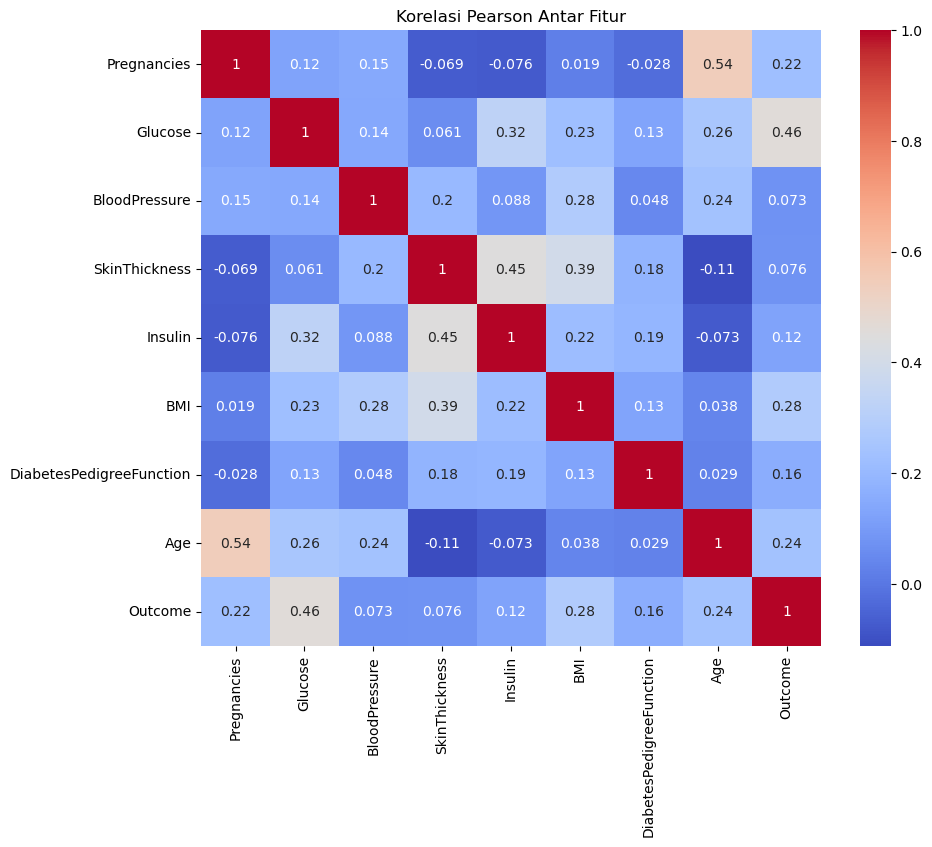

In [501]:
#korelasi pearson
plt.figure(figsize=(10,8))
sns.heatmap(df_new2.corr(),annot=True, cmap="coolwarm")
plt.title("Korelasi Pearson Antar Fitur")
plt.show()

# 5. PELATIHAN DAN PENGUJIAN MODEL

In [503]:
X = df_new2.drop(columns=["Outcome"])
y = df_new2["Outcome"]

In [505]:
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [507]:
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# 5.1 PELATIHAN MACHINE LEARNING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [623]:
# melakukan pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [625]:
#memanggil model
model_nv = GaussianNB()

#melatih model
model_nv.fit(X_train, y_train)

#menguji model
y_pred = model_nv.predict(X_test) 

#y_test tidak masuk karena dia akan menjadi kunci jawaban, untuk meghitung akurasi secara keseluruhan

In [627]:
#evaluasi model
#akurasi
print("AKURASI MODEL NV: " , accuracy_score(y_test,y_pred)*100)

AKURASI MODEL NV:  77.73766546329723


In [637]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       562
           1       0.68      0.60      0.64       269

    accuracy                           0.78       831
   macro avg       0.75      0.73      0.74       831
weighted avg       0.77      0.78      0.77       831



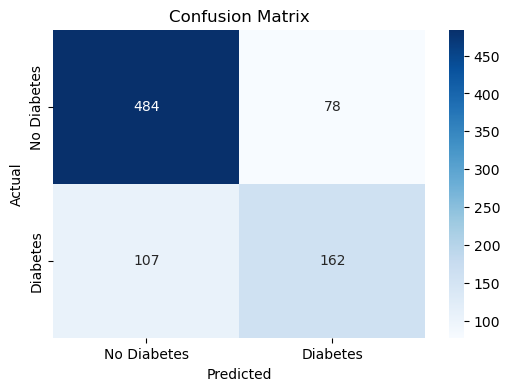

In [639]:
#confusion Matrix
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()